In [2]:
!pip install tensorflow

In [8]:
import tensorflow as tf

In [6]:
!pip install distutils

ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [12]:
mnist = tf.keras.datasets.mnist

In [14]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step


In [18]:
x_train, x_test = x_train/255, x_test/255

In [34]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(10)])

In [36]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                                                            metrics=['accuracy'])

In [40]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9774 - loss: 0.0780
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9822 - loss: 0.0561
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9871 - loss: 0.0422
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9902 - loss: 0.0333
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9927 - loss: 0.0255


In [42]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

313/313 - 0s - 843us/step - accuracy: 0.9788 - loss: 0.0755
Test Accuracy: 0.9787999987602234


In [44]:
model.save("Keras_Model.keras")

In [48]:
new_model = tf.keras.models.load_model("Keras_Model.keras")

In [50]:
import numpy as np
predictions = model.predict(x_test)
print(predictions[9])
print(np.argmax(predictions[9]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step
[-14.065358  -13.721999  -13.410879   -0.8448478   2.0970995  -9.811364
 -17.672594   -1.2969694   1.5985277  12.25511  ]
9


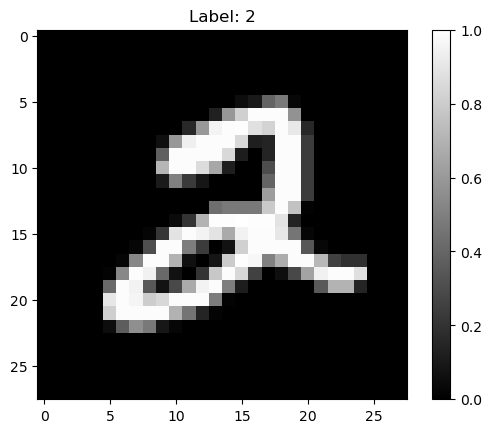

In [54]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5], cmap='gray')
plt.title(f"Label: {y_train[5]}")
plt.colorbar()
plt.show()